In [ ]:
# Простейшая регрессионная модель;
# alpha = 0.05

# Лабораторная работа № 10 по Математической Статистике;
# Вариант 13;
# Выполнил: Фомин Олег Витальевич;
# Группа: ФН11-53Б;

import numpy as np
import scipy.stats as ss
from typing import List, Callable
from matplotlib import pyplot as plot

In [ ]:
# Описание функции спрямления многомерного списка:
def flatten(l):
    return [item for sublist in l for item in sublist]

# Оценка остаточной дисперсии:
def res_variance(X_k: List[List[float]], Y_k: List[List[float]],
                 linear_reg: Callable[[float, float, float], float],
                 beta1: float, beta_0: float) -> float: # residual_variance
  count_elem, delta_squared = 0, 0
  for k_index in range(len(X_k)):
    for m_index in range(len(X_k[k_index])):
      delta_squared += (Y_k[k_index][m_index] - linear_reg(X_k[k_index][m_index], beta_1, beta_0)) ** 2
      count_elem += 1
  return (delta_squared / (count_elem - 2)) ** (1/2)

In [ ]:
# Выборки варианта 13:

X_k = [[-0.223,0.275,0.46,0.015,0.717,-1.229,-1.29,-0.15,-1.814,-1.84],
       [2.082,1.752,-1.047,-0.316,0.457,-0.17,0.347,1.48,0.445,0.232],
       [-1.259,0.194,-0.976,0.372,0.299,-0.019,0.904,0.429,1.201,0.269],
       [1.89,0.848,0.607,-0.674,-0.711,-1.728,1.458,-1.422,-1.973,0.506],
       [0.159,-0.322,-0.121,-1.435,0.892,1.318,1.599,-0.734,-1.595,1.105],
       [0.39,-2.043,0.554,-1.756,-1.048,1.967,0.588,-0.026,-0.011,0.032],
       [0.687,0.377,-3.524,-1.789,1.533,0.933,-0.427,0.186,2.384,-1.3],
       [-1.566,2.326,-2.679,-2.226,-1.566,1.54,0.823,-3.05,0.766,-1.093],
       [-1.342,-0.574,-0.474,1.19,0.093,1.169,-1.482,-0.346,-1.534,-2.107],
       [0.259,0.169,-0.689,1.219,-0.798,1.757,0.917,-0.498,-1.041,-1.037]]

Y_k = [[3.527,3.546,4.027,3.549,4.401,3.02,3.591,3.411,2.848,2.884],
       [5.069,4.361,3.261,3.589,4.033,3.56,3.951,4.287,4.067,3.534],
       [3.485,4.089,3.311,3.539,3.856,4.063,4.493,4.091,4.198,3.883],
       [4.598,3.93,3.902,3.235,3.795,3.154,4.691,3.247,2.943,3.983],
       [3.797,3.959,3.975,2.876,3.985,4.448,4.42,2.973,2.978,4.248],
       [3.55,2.708,3.946,3.248,3.439,4.504,4.364,3.878,3.767,3.702],
       [4.405,3.893,2.364,3.115,4.386,4.086,3.67,3.717,4.989,3.34],
       [3.14,4.83,2.746,3.349,3.228,4.16,4.293,2.629,3.67,3.296],
       [3.464,3.799,3.633,4.609,3.639,4.137,3.22,3.614,3.194,3.068],
       [3.754,3.484,3.522,4.232,3.575,4.137,3.981,3.543,3.198,3.24]]


data_x = np.array(flatten(X_k))
data_y = np.array(flatten(Y_k))

In [ ]:
print(f"Количество факторов X_k (предикторов): {len(data_x)}\nКоличество откликов Y_k: {len(data_y)}")

Количество факторов X_k (предикторов): 100
Количество откликов Y_k: 100


In [ ]:
# Оценка параметров регрессионной модели:
# В силу симметричности ковариационной матрицы и
# и того, что мы проверяем зависимость лишь двух случайных векторов
# cov = cov[0][1] = cov[1][0] // ковариация data_x и data_y

cov = np.cov(data_x, data_y)[0][1]
print("Некоторые статистики над выборками X_k и Y_k:")
print(f"Выборочное среднее выборки X_k: {np.mean(data_x):.5}")
print(f"Выборочное среднее выборки Y_k: {np.mean(data_y):.5}")
print(f"Выборочная дисперсия X_k: {np.var(data_x, ddof=1):.5}")
print(f"Выборочная дисперсия Y_k: {np.var(data_y, ddof=1):.5}")
print(f"Ковариация (X_k; Y_k): {cov:.5}")


# Кф линейной регрессии:
beta_1 = cov / np.var(data_x, ddof=1)
beta_0 = np.mean(data_y) - beta_1 * np.mean(data_x)
print("\nКоэффициент линейной регрессии:")
print(f"Коэффициент линейной регрессии beta_1: {beta_1 :.5}")
print(f"Коэффициент линейной регрессии beta_0: {beta_0:.5}")

Некоторые статистики над выборками X_k и Y_k:
Выборочное среднее выборки X_k: -0.12903
Выборочное среднее выборки Y_k: 3.7212
Выборочная дисперсия X_k: 1.5577
Выборочная дисперсия Y_k: 0.29671
Ковариация (X_k; Y_k): 0.62867

Коэффициент линейной регрессии:
Коэффициент линейной регрессии beta_1: 0.40358
Коэффициент линейной регрессии beta_0: 3.7732


In [ ]:
# Описание линейной регрессии:
def linear_reg(argument:float, beta_1: float, beta_0: float) -> float:
  return beta_1 * argument + beta_0

x = np.linspace(np.min(data_x), np.max(data_x), 20)
y = [linear_reg(arg, beta_1, beta_0) for arg in x]

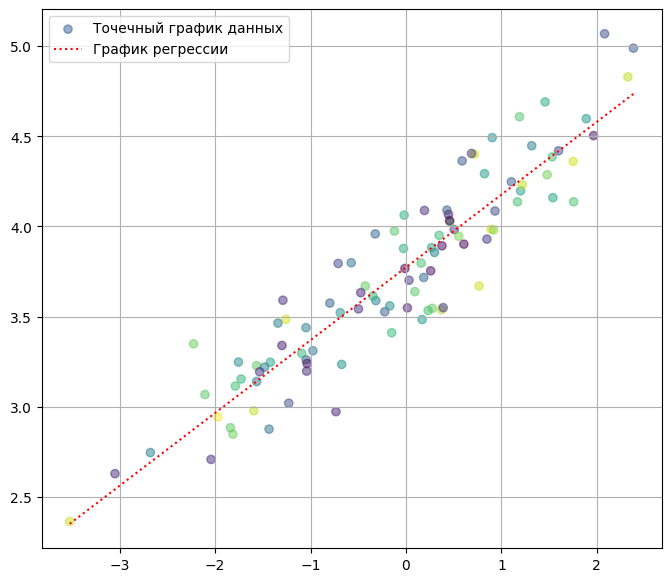

In [ ]:
# Построение графика:
plot.figure(figsize=(8,7))
plot.grid()

# График 1:
colors = np.random.rand(len(X_k) * len(X_k))
plot.scatter(X_k,
             Y_k,
             c = colors,
             alpha = 0.5,
             label = "Точечный график данных")
# График 2:
plot.plot(x,
          y,
          color = 'red',
          linestyle = ':',
          label = "График регрессии")

plot.legend(loc='upper left')
plot.show()

In [ ]:
# Оценка остаточной дисперсии:
res_var = res_variance(X_k, Y_k, linear_reg, beta_1, beta_0)
print(f'Оценка остаточной дисперсии: {res_var :.5}')

Оценка остаточной дисперсии: 0.20839


In [ ]:
# Значение квантиля t-распрделения Стьюдента в критической точке 0.975 с числом степеней свободы = 98;
qt_t = ss.t.ppf(q=1-.025, df=98) #+
print(qt_t, '\n')

# Значение квантиля Хи-квадрат в критической точке 0.975 с числом степеней свободы = 98;
qt_chi_l = ss.chi2.ppf(q=.025, df=98)
qt_chi_r = ss.chi2.ppf(q=1-.025, df=98)
print(qt_chi_l)
print(qt_chi_r)

1.984467454426692 

72.50093949765828
127.28207236425453


## Доверительные интервалы с уровнем значимости 1 - alpha = 0.98:



In [ ]:
# Доверительный интервал для beta_1:
summary_first, summary_second, count_elem = 0, 0, 0
for k_index in range(len(X_k)):
  for m_index in range(len(X_k[k_index])):
    summary_first += (X_k[k_index][m_index]) ** 2
    summary_second += X_k[k_index][m_index]
    count_elem += 1

beta_1_l = beta_1 - ((qt_t * res_var) / (summary_first - (1 / count_elem) * (summary_second ** 2)) ** (1/2))
beta_1_r = beta_1 + ((qt_t * res_var) / (summary_first - (1 / count_elem) * (summary_second ** 2)) ** (1/2))

print(f"Вычисленное beta_1: {beta_1}")
print(f"{beta_1_l} < beta_1 < {beta_1_r}")

Вычисленное beta_1: 0.4035770412571189
0.3702754166727718 < beta_1 < 0.436878665841466


In [ ]:
# Доверительный интервал для beta_0:
summary_first, summary_second, count_elem = 0, 0, 0
for k_index in range(len(X_k)):
  for m_index in range(len(X_k[k_index])):
    summary_first += (X_k[k_index][m_index]) ** 2
    summary_second += X_k[k_index][m_index]
    count_elem += 1

beta_0_l = beta_0 - ((qt_t * res_var * summary_first ** (1/2)) / ((count_elem)**(1/2) * (summary_first - (1 / count_elem) * (summary_second ** 2)) ** (1/2)))
beta_0_r = beta_0 + ((qt_t * res_var * summary_first ** (1/2)) / ((count_elem)**(1/2) * (summary_first - (1 / count_elem) * (summary_second ** 2)) ** (1/2)))

print(f"Вычисленное beta_0: {beta_0}")
print(f"{beta_0_l} < beta_0 < {beta_0_r}")

Вычисленное beta_0: 3.773233545633406
3.7316556199375004 < beta_0 < 3.8148114713293113


In [ ]:
# Доверительный интервал для остаточной дисперсии:
res_var_l = ((res_var ** 2 * 98) / (qt_chi_r)) ** (1/2)
res_var_r = ((res_var ** 2 * 98) / (qt_chi_l)) ** (1/2)

print(f"Вычисленное delta: {res_var}")
print(f"{res_var_l} < delta < {res_var_r}")

Вычисленное delta: 0.20839493031879058
0.18285909604895775 < delta < 0.24228602798638038
